In [51]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [46]:
cars = pd.read_csv('explanations/datasets/cars.csv')
cars['origin'] = pd.get_dummies(cars['origin'], drop_first=False)
print(cars['origin'].value_counts())
cars.head(2)

0    313
1     79
Name: origin, dtype: int64


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,0,15.0
1,9.0,304.0,193,4732,18.5,0,20.0


In [47]:
X, y = cars.drop('size', axis=1), cars['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, shuffle=True)


In [50]:
rfr = RandomForestRegressor(n_estimators=400, min_samples_leaf=.12, random_state=42).fit(X_train, y_train)
acc_score = rfr.score(X_test, y_test)
print(f'Random Forest Regressor\'s accuracy score: {round(acc_score, 3)}')

y_pred = rfr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print(f'Test\'s RMSE: {round(rmse, 3)}')

Random Forest Regressor's accuracy score: 0.966
Test's RMSE: 0.788


In [52]:
lin_reg = LinearRegression().fit(X_train, y_train)
print(f'Test score with Linear Regression: {lin_reg.score(X_test, y_test)}')

y_linreg_pred = lin_reg.predict(X_test)
rmse_linreg = mean_squared_error(y_test, y_linreg_pred)**(1/2)
print(f'Test\'s RMSE: {round(rmse_linreg, 3)}')

Test score with Linear Regression: 0.9052184334661403
Test's RMSE: 1.316


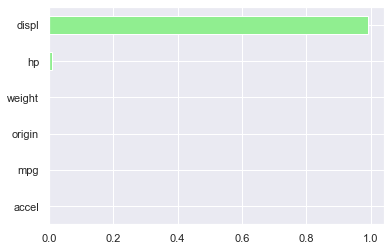

In [53]:
importance = pd.Series(rfr.feature_importances_, index=X.columns)
sorted_imporance = importance.sort_values()

#horizontal bar plot
sorted_imporance.plot(kind='barh', color='lightgreen')
plt.show()